In [7]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)
import warnings
warnings.filterwarnings('ignore')

In [8]:
'''
6만개 = 트레이닝 데이터셋
1만개 = 테스트 데이터셋 다운로드
'''

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_DATA", one_hot = True)

Extracting ./MNIST_DATA\train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA\train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA\t10k-labels-idx1-ubyte.gz


In [24]:
nb_classes = 10  #0~9
x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, nb_classes])
w = tf.Variable(tf.random_normal([28*28, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hf = tf.nn.softmax(tf.matmul(x,w) + b)
cost = tf.reduce_mean(tf.reduce_sum(y*-tf.log(hf), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
is_correct = tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size) # 600=6만/100번
        for i in range(total_batch): #600번
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) # 100개씩 데이터 읽어옴
            c, _ = sess.run([cost, optimizer], feed_dict = {x:batch_xs, y:batch_ys})
            avg_cost += c/total_batch
        print('에폭 : ', '%4d' % (epoch+1), '\tcost : ', '{:.9f}'.format(avg_cost))
    print("학습이 완료되었습니다")
    print("모델 정확도 : ", sess.run([accuracy], feed_dict = {x:mnist.test.images, y:mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples-1)
    print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("prediction : ", sess.run(tf.argmax(hf,1), feed_dict = {x:mnist.test.images[r:r+1]}))

에폭 :     1 	cost :  2.822586681
에폭 :     2 	cost :  1.078450308
에폭 :     3 	cost :  0.867911742
에폭 :     4 	cost :  0.764602814
에폭 :     5 	cost :  0.698292835
에폭 :     6 	cost :  0.651058986
에폭 :     7 	cost :  0.614030538
에폭 :     8 	cost :  0.585306535
에폭 :     9 	cost :  0.562023124
에폭 :    10 	cost :  0.540933899
에폭 :    11 	cost :  0.523964002
에폭 :    12 	cost :  0.507869062
에폭 :    13 	cost :  0.495070499
에폭 :    14 	cost :  0.481970690
에폭 :    15 	cost :  0.471029825
학습이 완료되었습니다
모델 정확도 :  [0.89]
Label :  [3]
prediction :  [3]


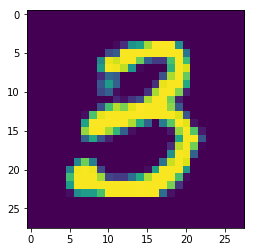

In [25]:
plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
plt.show()